## **Mall Customer Segmentation using K-Means Cluster**

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Mall_Customers.csv'
data = pd.read_csv(file_path)

In [2]:
# Display the first few rows of the dataset
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
# Select the features for clustering
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [5]:
# Determine the optimal number of clusters using the elbow method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, n_init=10, random_state=42)  # Set n_init explicitly to suppress the warning
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

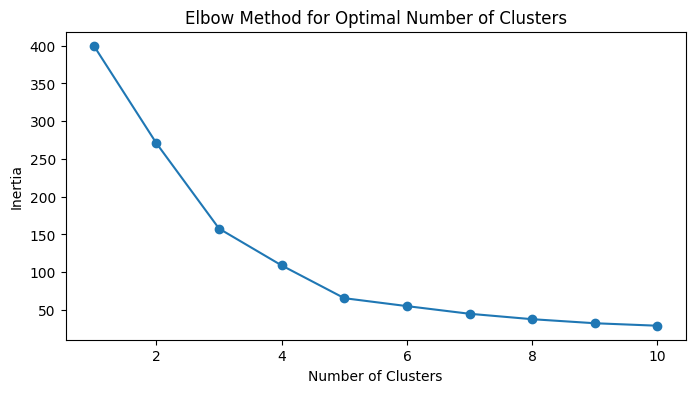

In [6]:
# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [14]:
# Apply K-means clustering with the chosen number of clusters
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)  # Set n_init explicitly to suppress the warning
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the original dataframe
data['Cluster'] = clusters

# Verify the addition of the 'Cluster' column
print("Data with Clusters:\n", data.head())

Data with Clusters:
    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        2  
1        3  
2        2  
3        3  
4        2  


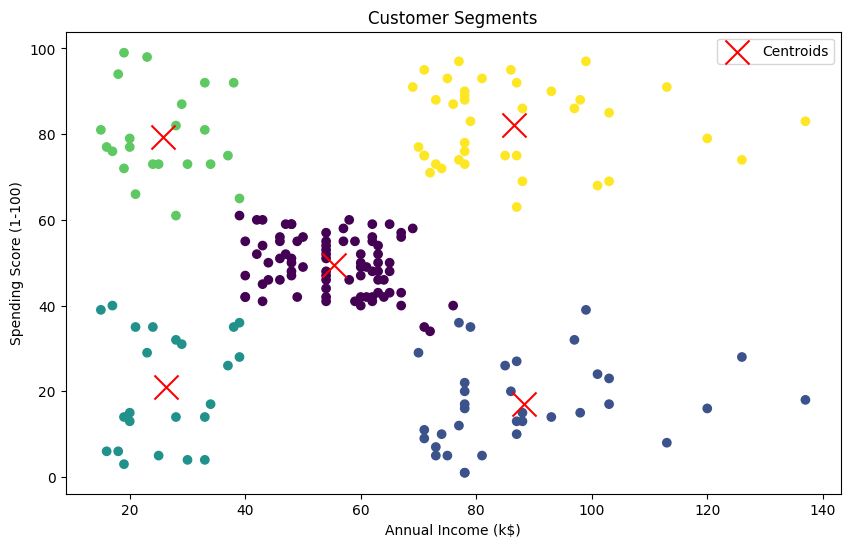

In [9]:
# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0] * scaler.scale_[0] + scaler.mean_[0],
            kmeans.cluster_centers_[:, 1] * scaler.scale_[1] + scaler.mean_[1],
            s=300, c='red', label='Centroids', marker='x')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.legend()
plt.show()

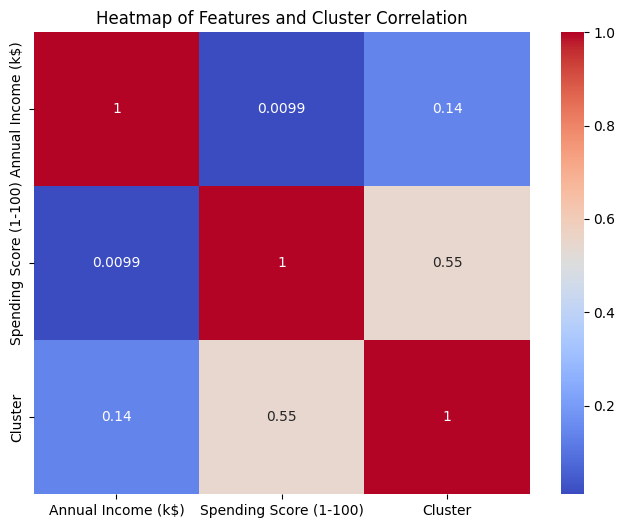

In [15]:
# Visualize the distribution of customers within each cluster using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data[['Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Features and Cluster Correlation')
plt.show()

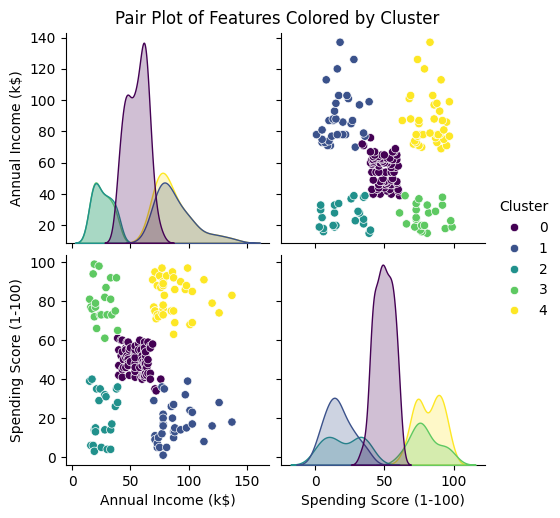

In [16]:
# Pair plot to visualize the relationships between the features and clusters
sns.pairplot(data[['Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']], hue='Cluster', palette='viridis')
plt.suptitle('Pair Plot of Features Colored by Cluster', y=1.02)
plt.show()


In [17]:
# Summary of clusters
print("Cluster Centroids:\n", kmeans.cluster_centers_)
print("\nCluster Counts:\n", data['Cluster'].value_counts())

Cluster Centroids:
 [[-0.20091257 -0.02645617]
 [ 1.05500302 -1.28443907]
 [-1.30751869 -1.13696536]
 [-1.32954532  1.13217788]
 [ 0.99158305  1.23950275]]

Cluster Counts:
 Cluster
0    81
4    39
1    35
2    23
3    22
Name: count, dtype: int64
